# План работы

1. Подготовка данных
2. Исследование задачи
3. Обработка дисбаланса
4. Тестирование модели
5. Вывод

## Подготовка данных

<div style="border:solid blue 2px; padding: 20px">

Откроем и изучим файл
</div>

<div style="border:solid blue 2px; padding: 20px">

Импортируем библиотеки
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# чтение файла с данными и сохранение в data_users
# метод try-except поможет загрузить данные локально или глобально
try:
    df = pd.read_csv('C:/Users/Churn.csv')  # Локальный путь
except:
    df = pd.read_csv('/datasets/Churn.csv')  # Серверный путь

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [3]:
# получение первых 5 строк таблицы
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [4]:
# получение общей информации о данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `describe()` получим описание данных
    
    
</div> 

In [5]:
# описание данных
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `unique()` получим уникальные значения
    
    
</div> 

In [6]:
# просмотр уникальных Tenure
df['Tenure'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

<div style="border:solid blue 2px; padding: 20px">
    
Пропуски `Tenure` обнаружены `NaN`
    
Причина появления: технологическая. 
    
Возможно пропуски появились при выгрузке данных.
    
Проблему решим заполнением на `11`, принимая это значение у клиентов за `unknown`,
    
при этом сохраним все объеты не удаляя пропуски и не заменяя их на некорректные.
    
Хотя можно предположить что объекты с пропусками значений в признаке `Tenure`,
    
являются с неизвестной клиентской историей и их можно было бы причислить к новым клиентам,
    
со значением в признаке `Tenure` `0`, но лучше данные не искажать неподтверждёнными фактами!!!
    
Можно предложить сделать выбор `Tenure` с помощью выпадающего списка, чтобы устранить пропуски.
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `fillna()` заменим в `Tenure` пропуски `NaN` на `11`

    
    
</div> 

In [7]:
# замена пропусков в Tenure
df['Tenure'] = df['Tenure'].fillna(11)

In [8]:
# замена вещественных типов на целые
df['Tenure'] = df['Tenure'].astype('int')

<div style="border:solid blue 2px; padding: 20px">
    

Методом `str.lower()` приведём к лаконичному виду названия столбцов `columns`

    
    
</div> 

In [9]:
# пназвания столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

<div style="border:solid blue 2px; padding: 20px">
    
Посчитаем сколько строк являются дубликатами.
    
    
</div>

In [10]:
# подсчет явных дубликатов
print('Всего строк дубликатов: ', df.duplicated().sum())

Всего строк дубликатов:  0


<div style="border:solid blue 2px; padding: 20px">

    
Рассмотрим зависимость между числовыми факторами
    

балансом на счёте `balance` и предполагаемой зарплатой `estimatedsalary`
 
    
Получим таблицу с коэффициентами корреляции методом `corr()`
    
    
Потроим диаграммы рассеяния `.plotting.scatter_matrix`
    


</div> 

In [11]:
# вывод строк для определения зависимости
df_correlation = df.loc[:,['balance','estimatedsalary']]
df_correlation.head()

,balance,estimatedsalary
0,0.00,101348.88
1,83807.86,112542.58
2,159660.80,113931.57
3,0.00,93826.63
4,125510.82,79084.10


In [12]:
# вывод матрицы корреляции
df_correlation.corr()

,balance,estimatedsalary
balance,1.000000,0.012797
estimatedsalary,0.012797,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc653bda50>,
      dtype=object)

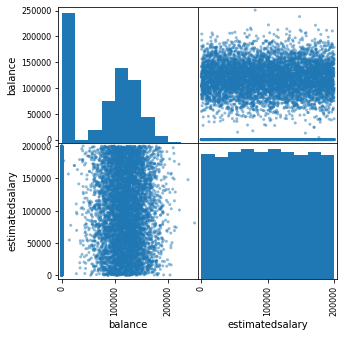

In [13]:
# построение диаграмм рассеяния
pd.plotting.scatter_matrix(df_correlation, figsize=(5, 5))

<div style="border:solid blue 2px; padding: 20px">

    
Корреляция `0.01` между балансом на счёте `balance` и предполагаемой зарплатой `estimatedsalary`
    
Отсутствует мультиколлинеарность между балансом и зарплатой
    
В модель включаем числовые факторы
    


</div> 

<div style="border:solid blue 2px; padding: 20px">
    

Признаки `rownumber` `customerid` `surname` исключим из данных
    
`индекс строки`, `уникальный идентификатор` и `фамилия` не показывают взаимосвязь признаков и объектов
    


    
    
</div> 

In [14]:
# удаление столбцов
df = df.drop(['rownumber','customerid','surname'], axis=1)

<div style="border:solid blue 2px; padding: 20px">
    
   

Преобразуем категориальные признаки прямым кодированием, чтобы обучить логистическую регрессию
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
   

Функцией `pd.get_dummies()` с аргументом `drop_first=True` исключим попадание 
    
в ловушку фиктивных признаков
    
Посмотрим данные в случайном порядке, используя метод `sample()`
    
    
</div> 

In [15]:
# вызов функций
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
6524,651,35,1,163700.78,3,1,1,29583.48,1,1,0,0
2087,716,52,7,65971.61,2,1,0,14608.00,1,0,0,0
2233,565,38,0,122447.76,1,0,0,67339.34,0,0,1,1
2814,737,40,2,162485.80,2,1,0,149381.32,0,1,0,0
1898,850,45,5,127258.79,1,1,1,192744.23,1,1,0,0


<div style="border:solid blue 2px; padding: 20px">
    
 
Сохраним в переменную `random_state` значение параметра, чтобы результаты получились одинаковыми
    
    
</div> 

In [16]:
# сохранение параметра
random_state = 1234

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
**Оценка полученных данных**

Наблюдения, представленные в таблице описываются категориальными и количественными значениями.
    
Данные можно исследовать для дальнейшего анализа.
    
Данные содержат много категориальных признаков и проблемы (пропуски).
    
Пропущенные значения в числе количества лет `tenure` заполнили на `unknown` соответств `11`
    
Привели названия столбцов к нижнему регистру.
    
Применили технику прямого кодирования с защитой от дамми-ловушки `one-hot encoding`
    

    

    
    
**Таблица `churn` (информация о клиентах)**:
    
`rownumber` — индекс строки в данных
    
`customerid` — уникальный идентификатор клиента
    
`surname` — фамилия
    
`creditscore` — кредитный рейтинг
    
`geography` — страна проживания
    
`gender` — пол
    
`age` — возраст
    
`tenure` — сколько лет человек является клиентом банка
    
`balance` — баланс на счёте
    
`numofproducts` — количество продуктов банка, используемых клиентом
    
`hascrcard` — наличие кредитной карты
    
`isactivemember` — активность клиента
    
`estimatedsalary` — предполагаемая зарплата
    
`exited` — факт ухода клиента
    

**Категориальный целевой признак** - `exited` - задача классификации
    
**Количественные** - `balance` , `estimatedsalary`
    
    
</div>

## Исследование задачи

<div style="border:solid blue 2px; padding: 20px">
 
    
Методом `value_counts()` посмотрим как часто в целевом признаке встречается класс `0` и `1`.
    
</div>

0    0.7963
1    0.2037
Name: exited, dtype: float64


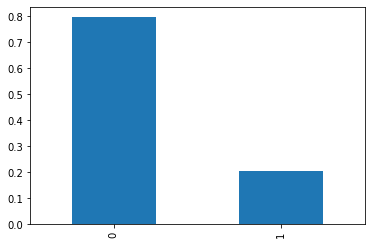

In [17]:
# подсчет значений
class_frequency = df['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

<div style="border:solid blue 2px; padding: 20px">
 
    
Около `20%` значений по факту ухода клиента. 
    
Баланс классов `0/1` соостветсвует соотношению `4/1`    

    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
 
    
Изучим модели без учёта дисбаланса
    
    

    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
 
`df` разделим на обучающую `df_train` выборку `3-и части` и `df_part` оставшиеся `2-е части`
    
    
</div> 

In [18]:
# получение обучающей выборки
df_train, df_part = train_test_split(df, test_size=0.40, random_state=random_state)
print('Объектов обучающей выборки', df_train.shape[0])

Объектов обучающей выборки 6000


<div style="border:solid blue 2px; padding: 20px">
    
 
Признаки обучающей выборки сохраним в отдельных переменных 
    
    
- `features_train`
    
    
- `target_train` - целевой признак
    
    
</div> 

In [19]:
# сохранение признаков обучающей выбороки в отдельных переменных
features_train = df_train.drop(columns=['exited'])
target_train = df_train['exited']

<div style="border:solid blue 2px; padding: 20px">
    
 
`df_part` разделим на валидационную `df_valid` выборку `1 часть` и `df_test` тестовую  `1 часть`
    
    
</div> 

In [20]:
# получение валидационной и тестовой выборки
df_valid, df_test = train_test_split(df_part, test_size=0.50, random_state=random_state)
print('Объектов валидационной выборки', df_valid.shape[0])
print('Объектов тестовой выборки', df_test.shape[0])

Объектов валидационной выборки 2000
Объектов тестовой выборки 2000


<div style="border:solid blue 2px; padding: 20px">
    
 
Признаки валидационной выборки сохраним в отдельных переменных 
    
    
- `features_valid`
    
    
- `target_valid` - целевой признак
    
    
</div> 

In [21]:
# сохранение признаков валидационной выбороки в отдельных переменных
features_valid = df_valid.drop(columns=['exited'])
target_valid = df_valid['exited']

<div style="border:solid blue 2px; padding: 20px">
    
 
Признаки тестовой выборки сохраним в отдельных переменных 
    
    
- `features_test`
    
    
- `target_test` - целевой признак
    
    
</div> 

In [22]:
# сохранение признаков тестовой выбороки в отдельных переменных
features_test = df_test.drop(columns=['exited'])
target_test = df_test['exited']

<div style="border:solid blue 2px; padding: 20px">
    
 
Получили соотношение по выборкам `df_train : df_valid : df_test` соостветственно `3 : 1 : 1`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — решающее дерево.
    
Перебирём циклом разные варианты глубины дерева `max_depth`.
    
    
</div> 

In [23]:
%%time

tree_model = None
best_depth = 0
best_accuracy = 0
best_f1 = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=random_state, max_depth=depth) # инициализируем модель
    model.fit(features_train, target_train) # обучение модели
    predictions_valid = model.predict(features_valid) # получение предсказания модели на валидационной выборке
    accuracy = accuracy_score(target_valid, predictions_valid) # качество модели на валидационной выборке
    f1 = f1_score(target_valid, predictions_valid)
    print('Глубина дерева', depth,'Оценка',accuracy, 'f1-мера', f1)
    if accuracy > best_accuracy:
        tree_model = model
        best_depth = depth
        best_accuracy = accuracy
        
print('Лучшая глубина дерева', best_depth,'Лучшая оценка', best_accuracy)

Глубина дерева 1 Оценка 0.812 f1-мера 0.0
Глубина дерева 2 Оценка 0.8405 f1-мера 0.5173978819969743
Глубина дерева 3 Оценка 0.8535 f1-мера 0.4128256513026052
Глубина дерева 4 Оценка 0.854 f1-мера 0.4785714285714286
Глубина дерева 5 Оценка 0.858 f1-мера 0.4760147601476015
Глубина дерева 6 Оценка 0.8575 f1-мера 0.514480408858603
Глубина дерева 7 Оценка 0.8585 f1-мера 0.5612403100775193
Глубина дерева 8 Оценка 0.8505 f1-мера 0.5449010654490106
Глубина дерева 9 Оценка 0.837 f1-мера 0.49221183800623064
Лучшая глубина дерева 7 Лучшая оценка 0.8585
CPU times: user 126 ms, sys: 3.63 ms, total: 130 ms
Wall time: 142 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
`accuracy` на модели решающее дерево составляет `0.8585` при глубине дерева `7`.
    
`f1-мера` на модели решающее дерево составляет `0.5612`.
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
     
    
Проверим адекватность модели    
    
    
</div> 

In [24]:
# замена дерева решений константной моделью
target_pred_constant = pd.Series(0, index=target_valid.index)
print("Оценка константной модели на валидационной выборке:", accuracy_score(target_valid, target_pred_constant))

Оценка константной модели на валидационной выборке: 0.812


<div style="border:solid blue 2px; padding: 20px">
    
    
Точность модели дерева решений на валидационной выборке `0.8585 > 0.812`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — случайный лес.
    
Перебирём циклом разные варианты количества деревьев `n_estimators`.
    
    
</div> 

In [25]:
%%time

forest_model = None
best_est = 0
best_accuracy = 0
best_f1 = 0
for est in range(1,60):
    model = RandomForestClassifier(random_state=random_state, n_estimators=est) # инициализируем модель
    model.fit(features_train, target_train) # обучение модели с заданным количеством деревьев
    predictions_valid = model.predict(features_valid) # получение предсказания модели на валидационной выборке
    accuracy = accuracy_score(target_valid, predictions_valid) # качество модели на валидационной выборке
    f1 = f1_score(target_valid, predictions_valid)
    print('Количество деревьев', est,'Оценка',accuracy, 'f1-мера', f1)
    if accuracy > best_accuracy:
        forest_model = model
        best_est = est
        best_accuracy = accuracy
        

print('Лучшее количество деревьев', best_est,'Лучшая оценка', best_accuracy)

Количество деревьев 1 Оценка 0.7835 f1-мера 0.4687116564417178
Количество деревьев 2 Оценка 0.8375 f1-мера 0.4367417677642981
Количество деревьев 3 Оценка 0.834 f1-мера 0.5350140056022409
Количество деревьев 4 Оценка 0.847 f1-мера 0.4848484848484849
Количество деревьев 5 Оценка 0.846 f1-мера 0.5523255813953488
Количество деревьев 6 Оценка 0.8505 f1-мера 0.5169628432956381
Количество деревьев 7 Оценка 0.8515 f1-мера 0.5533834586466165
Количество деревьев 8 Оценка 0.8575 f1-мера 0.5468998410174881
Количество деревьев 9 Оценка 0.8535 f1-мера 0.5580693815987934
Количество деревьев 10 Оценка 0.859 f1-мера 0.5407166123778502
Количество деревьев 11 Оценка 0.857 f1-мера 0.5640243902439024
Количество деревьев 12 Оценка 0.8615 f1-мера 0.5510534846029175
Количество деревьев 13 Оценка 0.8605 f1-мера 0.5687789799072643
Количество деревьев 14 Оценка 0.8645 f1-мера 0.5593495934959349
Количество деревьев 15 Оценка 0.8615 f1-мера 0.5665101721439749
Количество деревьев 16 Оценка 0.863 f1-мера 0.55663430

<div style="border:solid blue 2px; padding: 20px">
    
 
`accuracy` на модели случайный лес составляет `0.8655` при количестве деревьев `54`.
    
`f1-мера` на модели случайный лес составляет `0.5687`.
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — логистическая регрессия.

    
    
</div> 

In [26]:
logistic_model = LogisticRegression(random_state=random_state, solver='liblinear') # инициализируем модель логистической регрессии
logistic_model.fit(features_train, target_train)  # обучение модели
predictions_valid = logistic_model.predict(features_valid)
result = logistic_model.score(features_valid, target_valid)
f1 = f1_score(target_valid, predictions_valid)
print("Оценка модели логистической регрессии на валидационной выборке:", result)
print("f1-мера модели логистической регрессии на валидационной выборке:", f1)

Оценка модели логистической регрессии на валидационной выборке: 0.81
f1-мера модели логистической регрессии на валидационной выборке: 0.02564102564102564


<div style="border:solid blue 2px; padding: 20px">
    
    
f1-мера на модели — решающее дерево `0.5612`
    
f1-мера на модели — случайный лес `0.5687`
    
f1-мера на модели — логистическая регрессия `0.0256`. 

    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Лучшее качество модели `0.8655` на валидационной выборке получено при применении алгоритма 
    
случайный лес при количестве деревьев `54`
    
</div> 

AUC-ROC RandomForestClassifier 0.8419690349544073


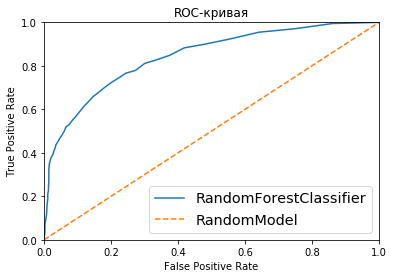

In [27]:
rfc_model = RandomForestClassifier(random_state=random_state, n_estimators=54)
rfc_model.fit(features_train, target_train)
probabilities_valid = rfc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-кривая")
plt.show()

## Борьба с дисбалансом

<div style="border:solid blue 2px; padding: 20px">
    
 
Аргументу `class_weight` присвоим значение `balanced`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — решающее дерево.
    
    
</div> 

In [28]:
%%time

tree_model = DecisionTreeClassifier(max_depth=7, random_state=random_state, class_weight='balanced')
tree_model.fit(features_train, target_train)
predictions_valid = tree_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.7795
Точность 0.4478330658105939
Полнота 0.7420212765957447
f1-мера 0.5585585585585585
CPU times: user 22 ms, sys: 4.12 ms, total: 26.1 ms
Wall time: 28.6 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — случайный лес.
    
    
</div> 

In [29]:
%%time

forest_model = RandomForestClassifier(n_estimators=54, random_state=random_state, class_weight='balanced')
forest_model.fit(features_train, target_train)
predictions_valid = forest_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.8655
Точность 0.7442922374429224
Полнота 0.43351063829787234
f1-мера 0.5478991596638656
CPU times: user 312 ms, sys: 0 ns, total: 312 ms
Wall time: 319 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — логистическая регрессия.

    
    
</div> 

In [30]:
%%time

logistic_model = LogisticRegression(random_state=random_state, solver='liblinear', class_weight='balanced')
logistic_model.fit(features_train, target_train)
predictions_valid = logistic_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.6985
Точность 0.3443072702331962
Полнота 0.6675531914893617
f1-мера 0.4542986425339366
CPU times: user 46.3 ms, sys: 4.18 ms, total: 50.5 ms
Wall time: 54.1 ms


<div style="border:solid blue 2px; padding: 20px">
    
f1-мера техникой взвешивания классов на модели
    
— решающее дерево `0.5585 < 0.5612` уменьшилась
    
— случайный лес `0.5478 < 0.5687` уменьшилась
    
— логистическая регрессия `0.4542 > 0.0256` увеличилась. 

    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Создадим функцию с именем `upsample()` c параметрами `features` `target` `repeat`, в теле функции 

разделим обучающую выборку на отрицательные и положительные объекты
    
скопируем несколько раз положительные объекты
    
`shuffle()` перемешаем данные и с учётом полученных данных
    
`upsample()` создим новую обучающую выборку
    
</div> 

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=random_state)
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts()

1    4888
0    4778
Name: exited, dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — решающее дерево.
    
    
</div> 

In [32]:
%%time

tree_model = DecisionTreeClassifier(max_depth=7, random_state=random_state)
tree_model.fit(features_upsampled, target_upsampled)
predictions_valid = tree_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.779
Точность 0.44711538461538464
Полнота 0.7420212765957447
f1-мера 0.5579999999999999
CPU times: user 27.9 ms, sys: 0 ns, total: 27.9 ms
Wall time: 26.4 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — случайный лес.
    
    
</div> 

In [33]:
%%time

forest_model = RandomForestClassifier(n_estimators=54, random_state=random_state)
forest_model.fit(features_upsampled, target_upsampled)
predictions_valid = forest_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.8575
Точность 0.6491803278688525
Полнота 0.526595744680851
f1-мера 0.5814977973568282
CPU times: user 455 ms, sys: 0 ns, total: 455 ms
Wall time: 469 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — логистическая регрессия.

    
    
</div> 

In [34]:
%%time

logistic_model = LogisticRegression(random_state=random_state, solver='liblinear')
logistic_model.fit(features_upsampled, target_upsampled)
predictions_valid = logistic_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.6445
Точность 0.3013048635824436
Полнота 0.675531914893617
f1-мера 0.41673502871205903
CPU times: user 48.3 ms, sys: 48.5 ms, total: 96.7 ms
Wall time: 86.3 ms


<div style="border:solid blue 2px; padding: 20px">
    

f1-мера техникой увеличения выборки на модели
    
— решающее дерево `0.5579` < `0.5585 < 0.5612` ещё уменьшилась
    
— случайный лес `0.5478 < 0.5687` < `0.58149` наоборот увеличилась
    
— логистическая регрессия `0.4167` < `0.4542 > 0.0256` уменьшилась.     
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Создадим функцию с именем `downsample()` c параметрами `features` `target` `fraction`, в теле функции 

разделим обучающую выборку на отрицательные и положительные объекты
    
`sample()` случайным образом отбросим часть `frac` из отрицательных объектов
    
`shuffle()` перемешаем данные и с учётом полученных данных
    
`downsample()` создим новую обучающую выборку
    
</div> 

In [35]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=random_state)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=random_state)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=random_state)
    return features_downsampled, target_downsampled
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
target_downsampled.value_counts()

1    1222
0    1194
Name: exited, dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — решающее дерево.
    
    
</div> 

In [36]:
%%time

tree_model = DecisionTreeClassifier(max_depth=7, random_state=random_state)
tree_model.fit(features_downsampled, target_downsampled)
predictions_valid = tree_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.7545
Точность 0.414050822122571
Полнота 0.7367021276595744
f1-мера 0.5301435406698565
CPU times: user 19.1 ms, sys: 0 ns, total: 19.1 ms
Wall time: 17.4 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — случайный лес.
    
    
</div> 

In [37]:
%%time

forest_model = RandomForestClassifier(n_estimators=54, random_state=random_state)
forest_model.fit(features_downsampled, target_downsampled)
predictions_valid = forest_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.7815
Точность 0.4494195688225539
Полнота 0.7207446808510638
f1-мера 0.5536261491317671
CPU times: user 164 ms, sys: 3.96 ms, total: 168 ms
Wall time: 187 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — логистическая регрессия.

    
    
</div> 

In [38]:
%%time

logistic_model = LogisticRegression(random_state=random_state, solver='liblinear')
logistic_model.fit(features_downsampled, target_downsampled)
predictions_valid = logistic_model.predict(features_valid)
print('Оценка', accuracy_score(target_valid, predictions_valid))
print('Точность', precision_score(target_valid, predictions_valid))
print('Полнота', recall_score(target_valid, predictions_valid))
print('f1-мера', f1_score(target_valid, predictions_valid))

Оценка 0.6505
Точность 0.30932703659976385
Полнота 0.6968085106382979
f1-мера 0.42845461978740795
CPU times: user 36.1 ms, sys: 28.6 ms, total: 64.6 ms
Wall time: 70.2 ms


<div style="border:solid blue 2px; padding: 20px">
    

f1-мера техникой уменьшения выборки на модели
    
— решающее дерево `0.5301 < 0.5579` уменьшилась
    
— случайный лес `0.5536` < `0.58149` уменьшилась
    
— логистическая регрессия `0.4167` < `0.4284` увеличилась.     
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем модель  — алгоритмом случайный лес техникой увеличения выборки.
    
    
</div> 

In [39]:
%%time

for est in range(1,60):
    forest_model = RandomForestClassifier(random_state=random_state, n_estimators=est)
    forest_model.fit(features_upsampled, target_upsampled)
    predictions_valid = forest_model.predict(features_valid)
    print('Количество деревьев', est,'f1-мера', f1_score(target_valid, predictions_valid))

Количество деревьев 1 f1-мера 0.48292682926829267
Количество деревьев 2 f1-мера 0.45561139028475717
Количество деревьев 3 f1-мера 0.5509933774834438
Количество деревьев 4 f1-мера 0.5271317829457365
Количество деревьев 5 f1-мера 0.5578231292517007
Количество деревьев 6 f1-мера 0.5440729483282675
Количество деревьев 7 f1-мера 0.5698324022346368
Количество деревьев 8 f1-мера 0.5493171471927162
Количество деревьев 9 f1-мера 0.5528913963328632
Количество деревьев 10 f1-мера 0.545727136431784
Количество деревьев 11 f1-мера 0.5609065155807366
Количество деревьев 12 f1-мера 0.5697151424287856
Количество деревьев 13 f1-мера 0.5775248933143671
Количество деревьев 14 f1-мера 0.562406015037594
Количество деревьев 15 f1-мера 0.5718349928876244
Количество деревьев 16 f1-мера 0.5654761904761905
Количество деревьев 17 f1-мера 0.5665236051502145
Количество деревьев 18 f1-мера 0.5672082717872968
Количество деревьев 19 f1-мера 0.5706134094151213
Количество деревьев 20 f1-мера 0.5768667642752562
Количеств

In [40]:
%%time

forest_model = RandomForestClassifier(random_state=random_state, n_estimators=26)
forest_model.fit(features_upsampled, target_upsampled)
predictions_valid = forest_model.predict(features_valid)
print('f1-мера', f1_score(target_valid, predictions_valid))

f1-мера 0.5894428152492669
CPU times: user 221 ms, sys: 109 µs, total: 221 ms
Wall time: 228 ms


<div style="border:solid blue 2px; padding: 20px">
    
 
`f1-мера` на модели случайный лес составляет `0.5894` при количестве деревьев `26`.
    
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Изменим гиперпараметры и доведём `f1-меру` модели до `0.59`.
    
    
</div> 

In [41]:
# просмотр модели
forest_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

<div style="border:solid blue 2px; padding: 20px">
    
 
Изменим гиперпараметр модели `min_samples_split`
    
    
    
</div> 

In [42]:
%%time

for samples_split in range(2, 11):
    forest_model =  RandomForestClassifier(random_state=random_state, n_estimators=26, min_samples_split=samples_split)
    forest_model.fit(features_upsampled, target_upsampled)
    predictions_valid = forest_model.predict(features_valid)
    print('samples_split', samples_split,'f1-мера', f1_score(target_valid, predictions_valid))

samples_split 2 f1-мера 0.5894428152492669
samples_split 3 f1-мера 0.569364161849711
samples_split 4 f1-мера 0.593886462882096
samples_split 5 f1-мера 0.5902578796561604
samples_split 6 f1-мера 0.5916666666666668
samples_split 7 f1-мера 0.5730027548209367
samples_split 8 f1-мера 0.5737704918032788
samples_split 9 f1-мера 0.5834464043419267
samples_split 10 f1-мера 0.5805592543275632
CPU times: user 1.98 s, sys: 7.71 ms, total: 1.99 s
Wall time: 2.07 s


<div style="border:solid blue 2px; padding: 20px">
    
 
Изменим гиперпараметр модели `min_samples_leaf`
    
    
    
</div> 

In [43]:
%%time

for samples_leaf in range(1, 11):
    forest_model =  RandomForestClassifier(random_state=random_state, n_estimators=26, min_samples_split=6, min_samples_leaf=samples_leaf)
    forest_model.fit(features_upsampled, target_upsampled)
    predictions_valid = forest_model.predict(features_valid)
    print('samples_leaf', samples_leaf,'f1-мера', f1_score(target_valid, predictions_valid))

samples_leaf 1 f1-мера 0.5916666666666668
samples_leaf 2 f1-мера 0.5847797062750334
samples_leaf 3 f1-мера 0.5966277561608301
samples_leaf 4 f1-мера 0.5920398009950248
samples_leaf 5 f1-мера 0.5815950920245399
samples_leaf 6 f1-мера 0.5879518072289157
samples_leaf 7 f1-мера 0.5940119760479041
samples_leaf 8 f1-мера 0.5988304093567252
samples_leaf 9 f1-мера 0.5774155995343423
samples_leaf 10 f1-мера 0.5889281507656065
CPU times: user 2.01 s, sys: 0 ns, total: 2.01 s
Wall time: 2.04 s


<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Лучшая `f1-мера` модели `0.5988` на валидационной выборке получена техникой увеличения выборки
    
алгоритмом случайный лес при `n_estimators=26` `min_samples_split=6` `min_samples_leaf=8`
    


    
</div> 

AUC-ROC RandomForestClassifier 0.8550712058484435


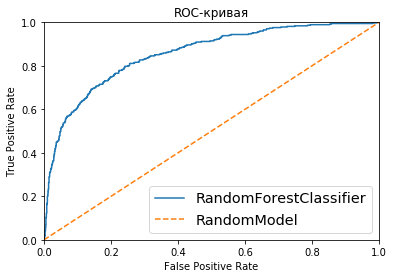

In [44]:
rfc_model = RandomForestClassifier(random_state=random_state, n_estimators=26, min_samples_split=6, min_samples_leaf=8)
rfc_model.fit(features_upsampled, target_upsampled)
probabilities_valid = rfc_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-кривая")
plt.show()

## Тестирование модели

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем модель на тестовой выборке — алгоритмом случайный лес техникой увеличения выборки.
    
    
</div> 

In [45]:
%%time

test_forest_model = RandomForestClassifier(random_state=random_state, n_estimators=26, min_samples_split=6, min_samples_leaf=8)
test_forest_model.fit(features_upsampled, target_upsampled)
predictions_test = test_forest_model.predict(features_test)
print('Оценка', accuracy_score(target_test, predictions_test))
print('Точность', precision_score(target_test, predictions_test))
print('Полнота', recall_score(target_test, predictions_test))
print('f1-мера', f1_score(target_test, predictions_test))

Оценка 0.8165
Точность 0.5708661417322834
Полнота 0.6605922551252847
f1-мера 0.6124604012671595
CPU times: user 197 ms, sys: 3.64 ms, total: 200 ms
Wall time: 207 ms


<div style="border:solid blue 2px; padding: 20px">
    
`f1-мера` модели `0.6124` на тестовой выборке получена техникой увеличения выборки
    
алгоритмом случайный лес при `n_estimators=26` `min_samples_split=6` `min_samples_leaf=8`
    


    
</div> 

AUC-ROC RandomForestClassifier 0.8450704019822584


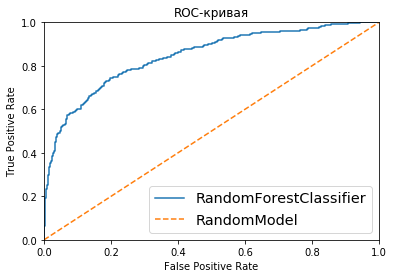

In [46]:
probabilities_test = test_forest_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-кривая")
plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
Метрика `AUC-ROC` модели `0.845` на тестовой выборке


    
</div> 

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Метрика `AUC-ROC` на тестовой выборке для полученной модели составляет `0.845`
    
Исходя из идеального показателя `AUC-ROC = 1`, можно оценить модель как `удовлетворителную`.
    
Метрика конечно лучше, чем у случайной модели `0.845 > 0.5`, но до идеального далеко.
    
Метрика `f1-мера` на тестовой выборке для полученной модели составляет `0.61`
    
Следовательно с такими показателями метрик `f1-мера` и `AUC-ROC` модель будет выполнять работу.
    
Полученную модель можно рекомендовать для прогнозирования оттока клиентов.
    
    
</div> 

Признак: 0 Важность: 0.08821991425762053
Признак: 1 Важность: 0.3199584413677694
Признак: 2 Важность: 0.04842987334054337
Признак: 3 Важность: 0.13132950721913664
Признак: 4 Важность: 0.18876009300540264
Признак: 5 Важность: 0.00986881024040773
Признак: 6 Важность: 0.047331205895216916
Признак: 7 Важность: 0.08316671295601902
Признак: 8 Важность: 0.04743185028445765
Признак: 9 Важность: 0.011603111227681437
Признак: 10 Важность: 0.02390048020574472


Text(0.5, 1.0, 'Важность признаков')

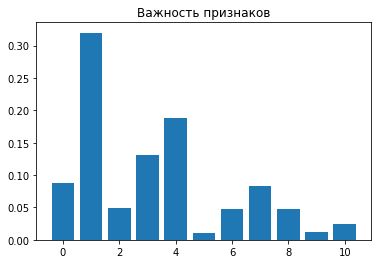

In [54]:
importances = test_forest_model.feature_importances_
for i,v in enumerate(importances):
    print('Признак:',i, 'Важность:',v)
# plot feature importances
plt.bar([x for x in range(len(importances))], importances)
plt.title("Важность признаков")
plt.show()

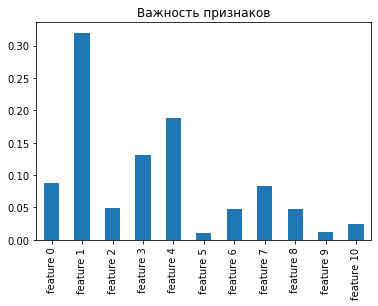

In [53]:
feature_names = [f"feature {i}" for i in range(features_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)


forest_importances.plot.bar()
plt.title("Важность признаков")
